### Assignment 4 - RAS 557 - Foldable Robotics
### Tirth Kamdar - ASU ID 1233721140

### Creatting Cut Patterns For Canine gait Using Custom Made DXF file (name of file: canine_secondpass_layer0_rigid_bottom_modified.dxf ) from libreCAD

In [2]:
!pip install foldable_robotics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.3 MB/s eta 0:00:00


In [3]:
import foldable_robotics.dxf as frd
import foldable_robotics as fr
import foldable_robotics.manufacturing as frm
from foldable_robotics.layer import Layer
from foldable_robotics.laminate import Laminate
import foldable_robotics.parts.castellated_hinge2 as frc
import shapely.geometry as sg
from foldable_robotics.pdf import Page
import foldable_robotics.pdf as frp
import foldable_robotics.parts.pill_joint as frpill
import foldable_robotics.plotter_support as frplt
import numpy

Importing Foldable Robotics Library and other necessary libraries to generate the cut patterns

In [4]:
fr.display_height=300
fr.resolution = 4
desired_degrees = 120
thickness = 1
plain_width = frm.plain_hinge_width(desired_degrees,thickness)
plain_width

1.7320508075688774

# Define hinge range-of-motion (desired_degrees) and laminate thickness.
# Compute plain hinge rigid-window width using frm.plain_hinge_width.
# Manufacturing knobs: support_width (> hinge width), kerf, adhesive stack, jig settings.

In [5]:
support_width = 2 # must be larger than hinge width
kerf = .05
is_adhesive = [False,True,False,True,False]
arc_approx = 10
NUM_LAYERS = 5
bridge_thickness = 2
bounding_box_padding = 10
jig_spacing = 10
jig_dia = 5

# Compute laser keepout, create jig corner holes, and a padded sheet bounding box. Ensure sheet is grid-aligned for easier fixture alignment.

In [6]:
body_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf',layer='first_rigid',arc_approx = arc_approx)
body_vertices

[[[-122.828407616741, -12.49],
  [-78.01, -12.49],
  [-78.01, 12.49],
  [-122.828407616741, 12.49]],
 [[-77.99, -12.49], [-28.01, -12.49], [-28.01, 12.49], [-77.99, 12.49]],
 [[-27.99, -12.49], [21.99, -12.49], [21.99, 12.49], [-27.99, 12.49]],
 [[22.01, -12.49], [71.99, -12.49], [71.99, 12.49], [22.01, 12.49]],
 [[72.01, -12.49], [121.99, -12.49], [121.99, 12.49], [72.01, 12.49]],
 [[-151.9912823455542, -12.49],
  [-122.8284076167409, -12.49],
  [-122.8284076167409, 12.5011522790571],
  [-151.9912823455542, 12.5011522790571]],
 [[-152.0, -43.0], [-35.0, -43.0], [-35.0, -18.0], [-152.0, -18.0]]]

# Convert drawn vertices to `Polygon` (body, holes) and `LineString` (joints).

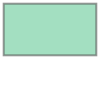

In [7]:
body_polygons = [sg.Polygon(item) for item in body_vertices]
body_polygons[0]

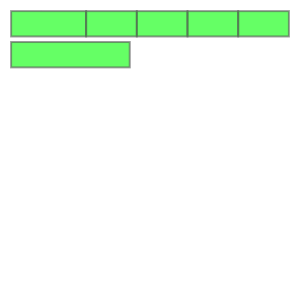

In [8]:
body_layer = Layer(*body_polygons)
body_layer

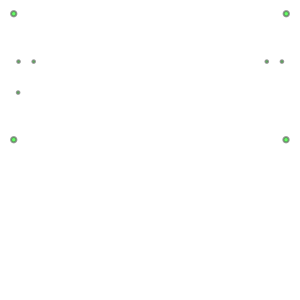

In [9]:
hole_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf',
layer='holes',
arc_approx = arc_approx)
hole_layer = Layer(*[sg.Polygon(item) for item in hole_vertices])
hole_layer

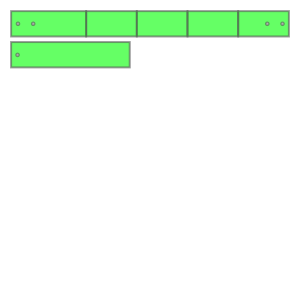

In [10]:
body_layer -= hole_layer
body_layer

# Subtract holes (and dilated cuts) from `body_layer` to produce the rigid outline.

In [13]:
joint_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf', layer='joints')
joint_vertices

[[[72.0, -12.5],
  [71.71132486540519, -12.5],
  [71.71132486540519, -9.5],
  [72.0, -9.5]],
 [[72.0, -9.5],
  [72.28867513459481, -9.5],
  [72.28867513459481, -6.5],
  [72.0, -6.5]],
 [[72.0, -6.5],
  [72.28867513459481, -6.5],
  [72.28867513459481, -3.5],
  [72.0, -3.5]],
 [[72.0, -3.5],
  [71.71132486540519, -3.5],
  [71.71132486540519, -0.5],
  [72.0, -0.5]],
 [[72.0, -0.5],
  [71.71132486540519, -0.5],
  [71.71132486540519, 2.5],
  [72.0, 2.5]],
 [[72.0, 2.5],
  [72.28867513459481, 2.5],
  [72.28867513459481, 5.5],
  [72.0, 5.5]],
 [[72.0, 5.5],
  [72.28867513459481, 5.5],
  [72.28867513459481, 8.5],
  [72.0, 8.5]],
 [[72.0, 8.5],
  [71.71132486540519, 8.5],
  [71.71132486540519, 11.5],
  [72.0, 11.5]],
 [[22.0, -12.5],
  [21.71132486540519, -12.5],
  [21.71132486540519, -9.5],
  [22.0, -9.5]],
 [[22.0, -9.5],
  [22.28867513459481, -9.5],
  [22.28867513459481, -6.5],
  [22.0, -6.5]],
 [[22.0, -6.5],
  [22.28867513459481, -6.5],
  [22.28867513459481, -3.5],
  [22.0, -3.5]],
 [[22.0

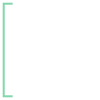

In [14]:
l = sg.LineString(joint_vertices[0])
l

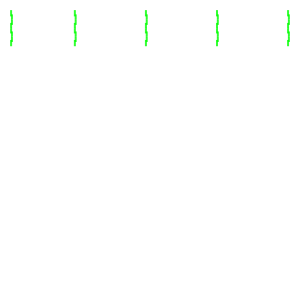

In [15]:
joint_lines_original_layer = Layer(*[sg.LineString(item) for item in joint_vertices])
joint_lines_original_layer

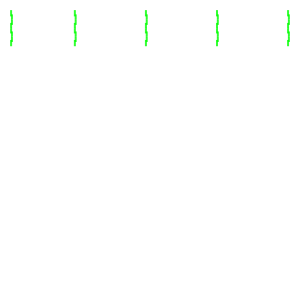

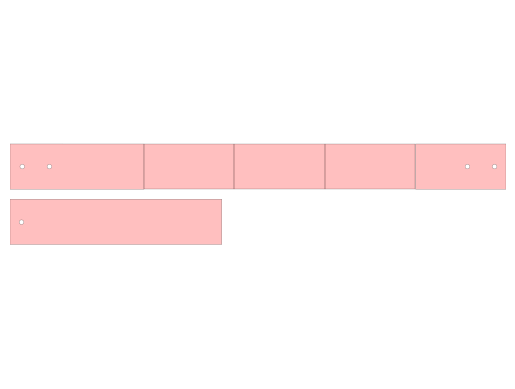

In [16]:
body_layer.plot()
joint_lines_original_layer

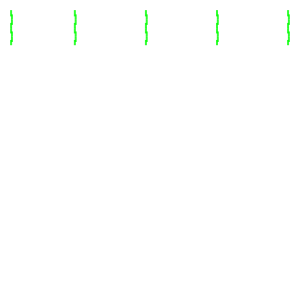

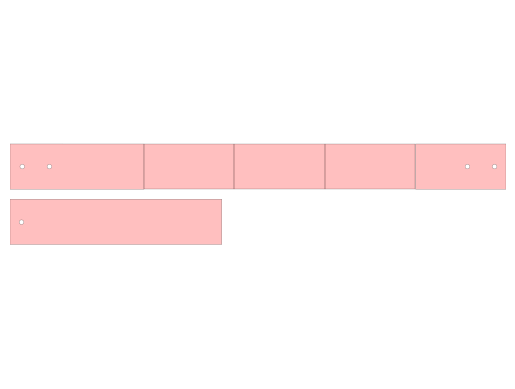

In [17]:
joint_lines_modified_layer = joint_lines_original_layer & body_layer
body_layer.plot()
joint_lines_modified_layer

In [18]:
modified_joint_vertices = [list(item.coords) for item in joint_lines_modified_layer.geoms]
modified_joint_vertices

[[(71.71132486540519, -12.49), (71.71132486540519, -9.5), (71.99, -9.5)],
 [(72.01, -9.5), (72.28867513459481, -9.5), (72.28867513459481, -6.5)],
 [(72.28867513459481, -6.5), (72.01, -6.5)],
 [(72.28867513459481, -6.5), (72.28867513459481, -3.5), (72.01, -3.5)],
 [(71.99, -3.5), (71.71132486540519, -3.5), (71.71132486540519, -0.5)],
 [(71.71132486540519, -0.5), (71.99, -0.5)],
 [(71.71132486540519, -0.5), (71.71132486540519, 2.5), (71.99, 2.5)],
 [(72.01, 2.5), (72.28867513459481, 2.5), (72.28867513459481, 5.5)],
 [(72.28867513459481, 5.5), (72.01, 5.5)],
 [(72.28867513459481, 5.5), (72.28867513459481, 8.5), (72.01, 8.5)],
 [(71.99, 8.5),
  (71.71132486540519, 8.5),
  (71.71132486540519, 11.5),
  (71.99, 11.5)],
 [(21.71132486540519, -12.49), (21.71132486540519, -9.5), (21.99, -9.5)],
 [(22.01, -9.5), (22.28867513459481, -9.5), (22.28867513459481, -6.5)],
 [(22.28867513459481, -6.5), (22.01, -6.5)],
 [(22.28867513459481, -6.5), (22.28867513459481, -3.5), (22.01, -3.5)],
 [(21.99, -3.5)

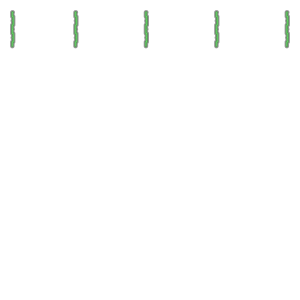

In [19]:
simple_joint_layer = joint_lines_modified_layer << plain_width/2
simple_joint_layer

# Intersect long joint lines with the body to trim, then dilate lines by `plain_width/2` to make hinge windows in the rigid layers.

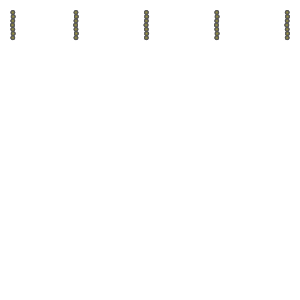

<Figure size 640x480 with 0 Axes>

In [52]:
corrected_joint_vertices = [[item.coords[0], item.coords[-1]] for item in joint_lines_modified_layer.geoms]
hole,dummy = frm.calc_hole(corrected_joint_vertices,plain_width/2)
fr.my_line_width=0
holes = hole.to_laminate(NUM_LAYERS)
holes<<=.5 # add a little extra material to ensure we removed enough.
holes

# Adding holes with `frm.calc_hole` to prevent sharp corners and nibs and also for helping us as placeholder for all the layers


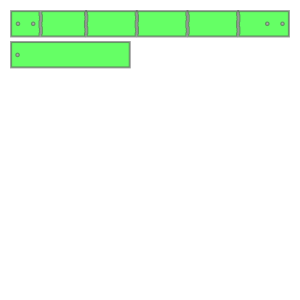

In [21]:
rigid_layer = (body_layer - simple_joint_layer)
rigid_layer

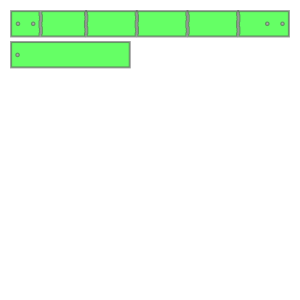

In [22]:
adhesive_layer = rigid_layer & body_layer
adhesive_layer

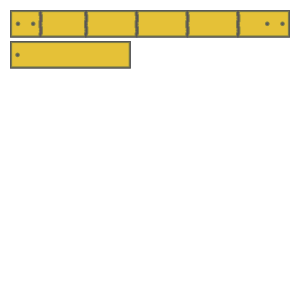

In [23]:
ideal_final_device = Laminate(rigid_layer,adhesive_layer, body_layer,
adhesive_layer,rigid_layer)
ideal_final_device

# Build `Laminate(rigid, adhesive, flexure, adhesive, rigid)` for a 5‑layer plain hinge device. For plain hinge, flexure is the body silhouette; rigid is body minus hinge windows and reliefs.

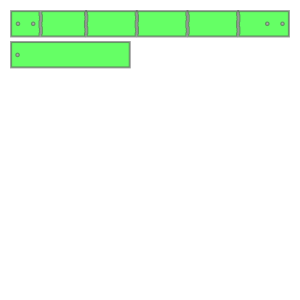

In [24]:
ideal_final_device[0]

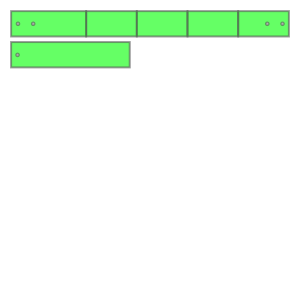

In [25]:
ideal_final_device[2]

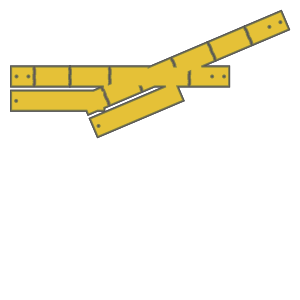

In [26]:
ideal_final_device | ideal_final_device.rotate(23).translate(80,23)

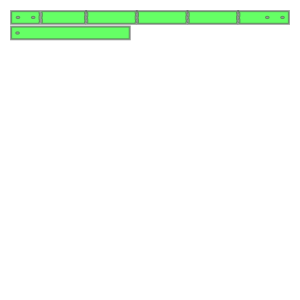

In [27]:
ideal_final_device[0].scale(2,1)

In [28]:
bridges = frd.read_lines('canine_secondpass_layer0_rigid_bottom_modified.dxf', layer='bridge')
bridges
bridges_layer = Layer(*[sg.LineString(item) for item in bridges])
bridges_layer <<= bridge_thickness
bridges_layer

In [29]:
bridges_lam = Laminate(bridges_layer,bridges_layer,Layer(),bridges_layer,bridges_layer)
bridges_lam

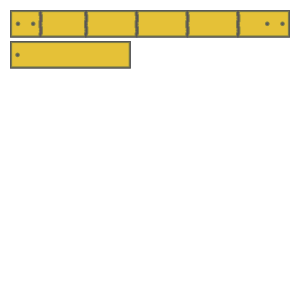

In [30]:
supported_actual_device = ideal_final_device | bridges_lam
supported_actual_device

In [31]:
diff = supported_actual_device - ideal_final_device
removal = frm.cleanup(diff, .1)
removal

In [32]:
removal = frm.keepout_laser(removal)
removal

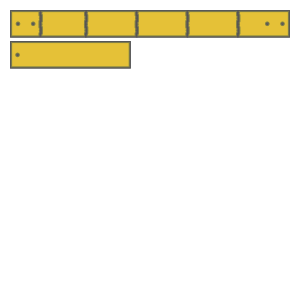

In [35]:
actual_final_device = ideal_final_device- holes - removal
actual_final_device

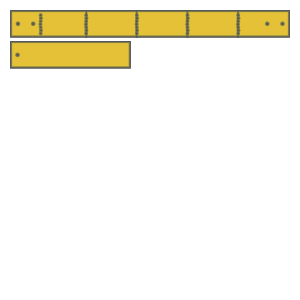

In [36]:
keepout = frm.keepout_laser(actual_final_device)
keepout

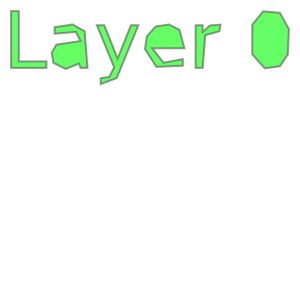

In [37]:
layer_id = frm.build_layer_numbers(NUM_LAYERS,text_size=jig_dia)
layer_id = layer_id.simplify(.2)
layer_id[0]

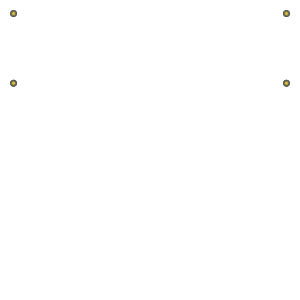

In [38]:
(x1, y1), (x2, y2)  = actual_final_device.bounding_box_coords()
w1,h1 = actual_final_device.get_dimensions()
w2 = round(w1/jig_spacing)*jig_spacing+jig_spacing+support_width
h2 = round(h1/jig_spacing)*jig_spacing+jig_spacing+support_width
x1 -= (w2-w1)/2
y1 -= (h2-h1)/2
x2 += (w2-w1)/2
y2 += (h2-h1)/2

points = []
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))
alignment_holes_layer = Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes

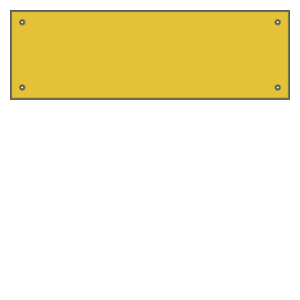

In [39]:

sheet_layer = (alignment_holes_layer<<bounding_box_padding).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet - alignment_holes

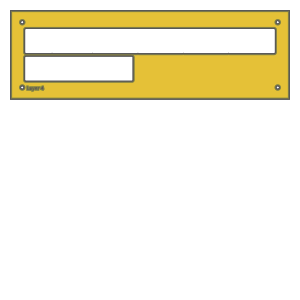

In [40]:
removable_scrap = frm.calculate_removable_scrap(
actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap-alignment_holes-layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

# Compute laser `keepout`, place corner jig holes, derive a padded, grid‑aligned `sheet`. Compute `removable_scrap` and `web`.

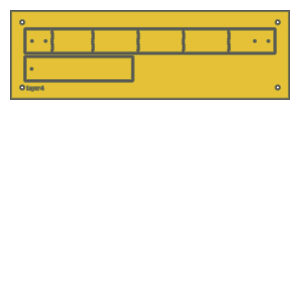

In [41]:
(web|actual_final_device)

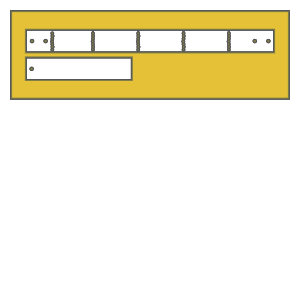

In [42]:
second_pass_scrap = sheet-keepout
second_pass_scrap

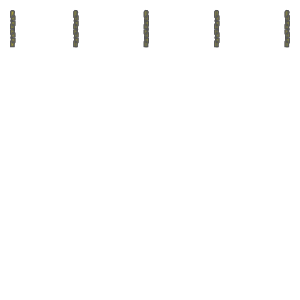

In [43]:
first_pass_scrap = sheet - second_pass_scrap - actual_final_device
first_pass_scrap = frm.cleanup(first_pass_scrap,.00001)
first_pass_scrap

# Use `frm.support` to add stencil bridges that hold islands during the first pass; add manual bridges near motor joints if needed.

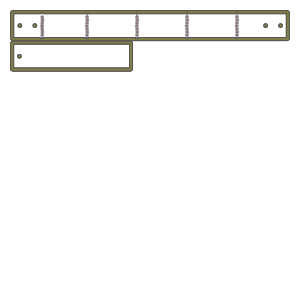

In [44]:
support = frm.support(actual_final_device,
frm.keepout_laser,support_width,support_width/2)
support

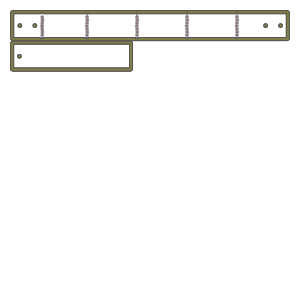

In [45]:
support | bridges_lam

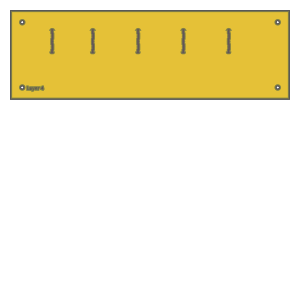

In [46]:
supported_design = web|actual_final_device|support| bridges_lam
supported_design

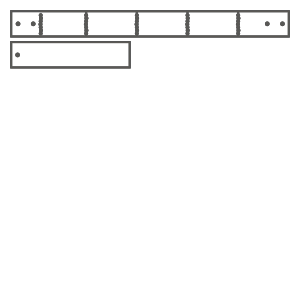

In [47]:
cut_material = (keepout<<kerf)-keepout
cut_material

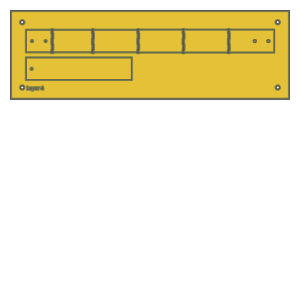

In [48]:
remaining_material = supported_design-cut_material
remaining_material

/usr/local/lib/python3.12/dist-packages/foldable_robotics/laminate.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


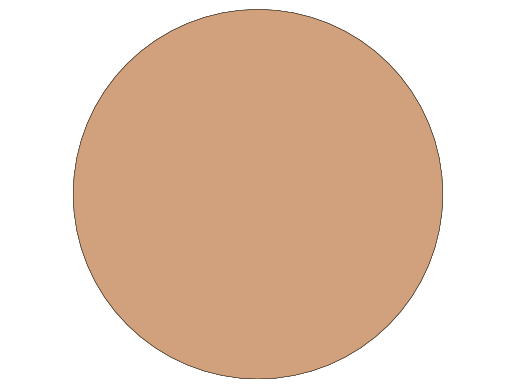

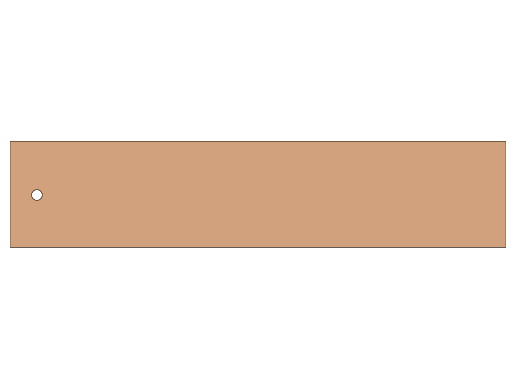

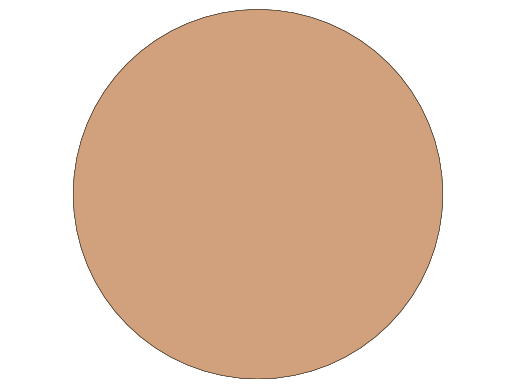

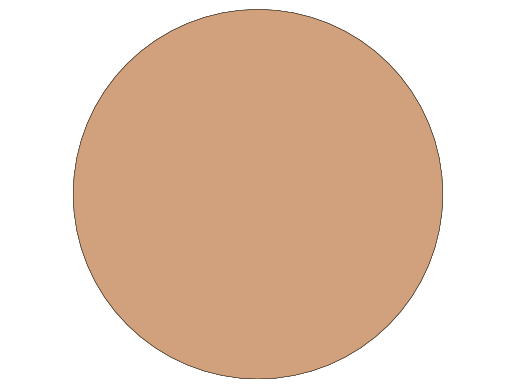

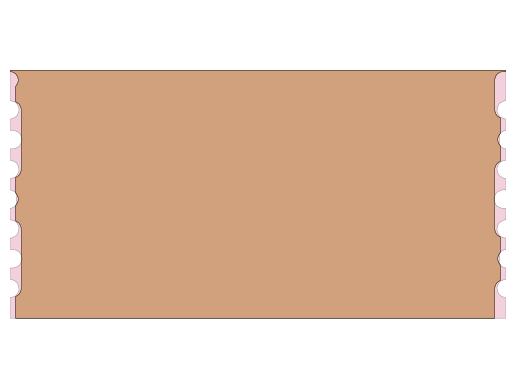

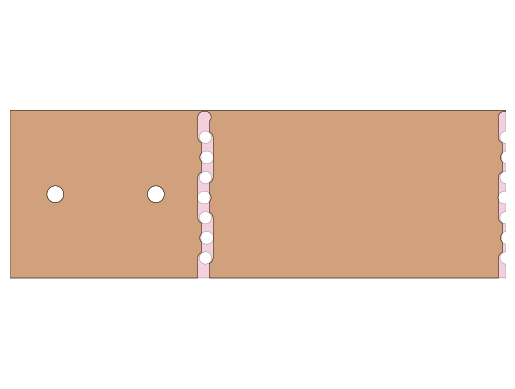

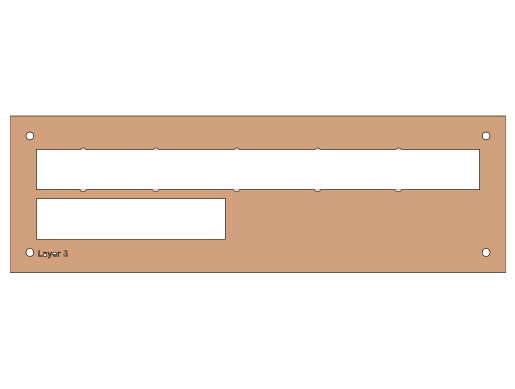

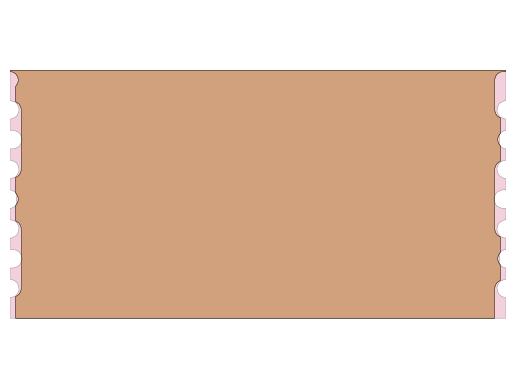

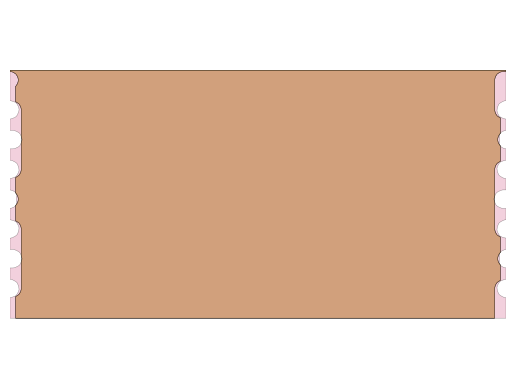

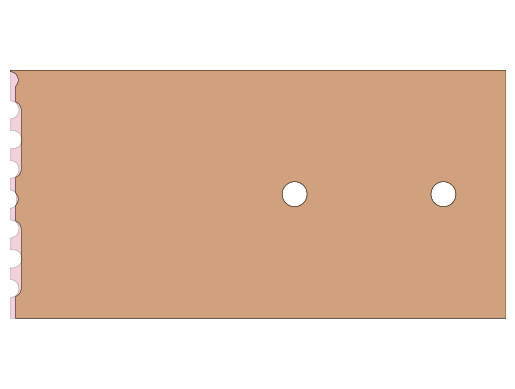

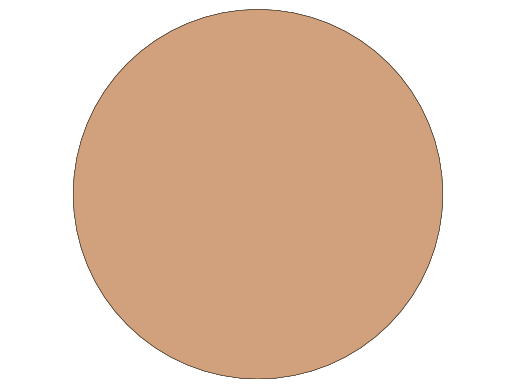

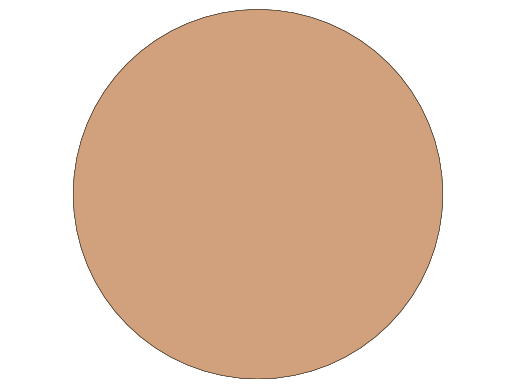

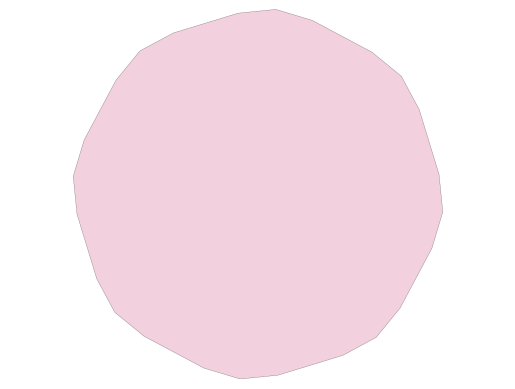

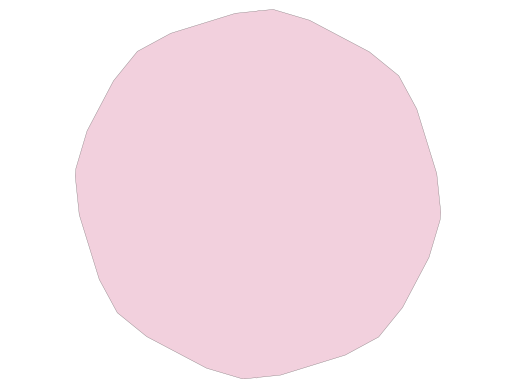

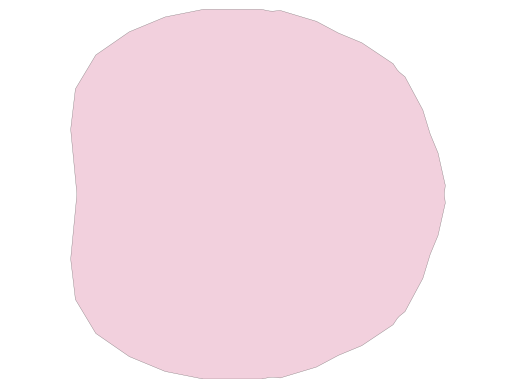

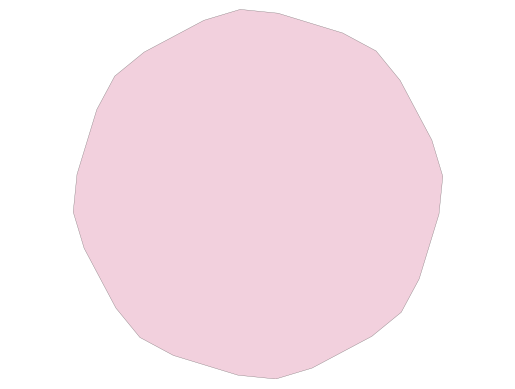

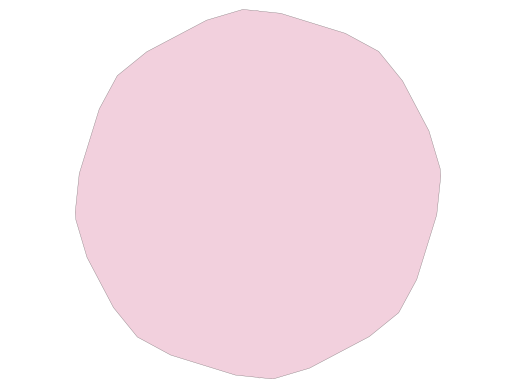

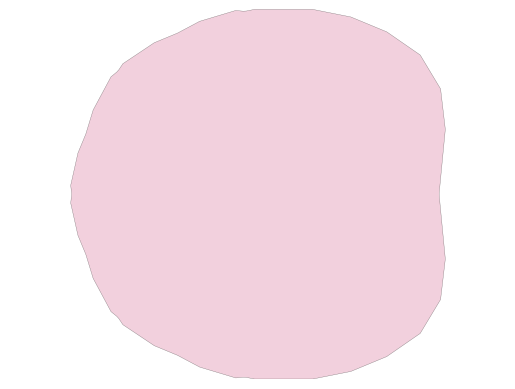

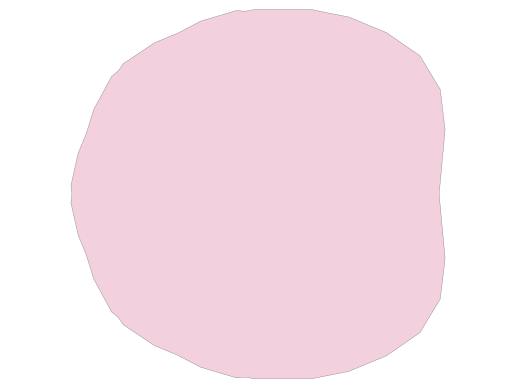

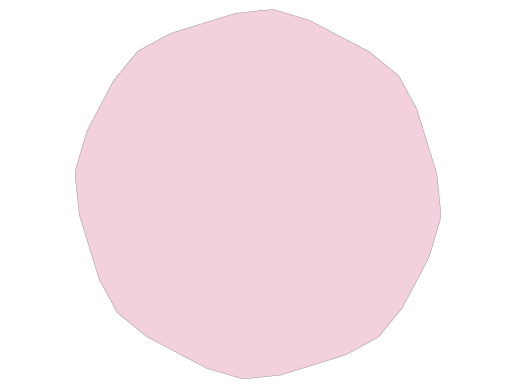

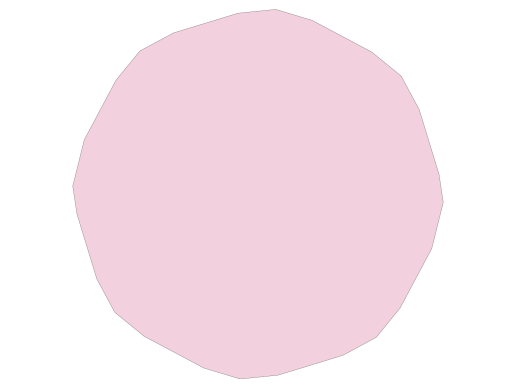

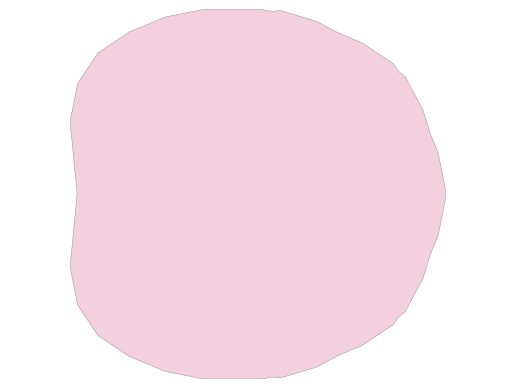

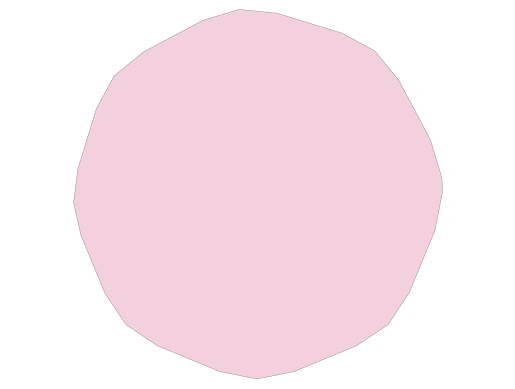

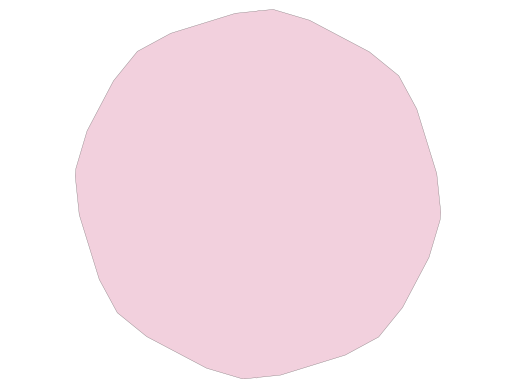

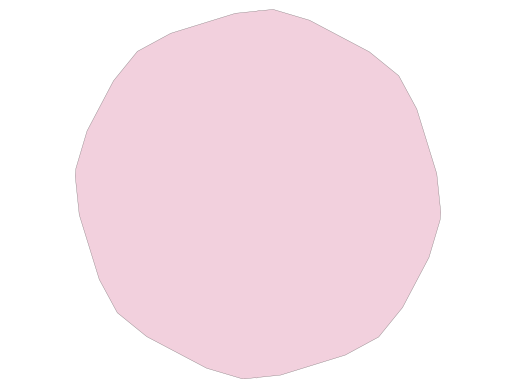

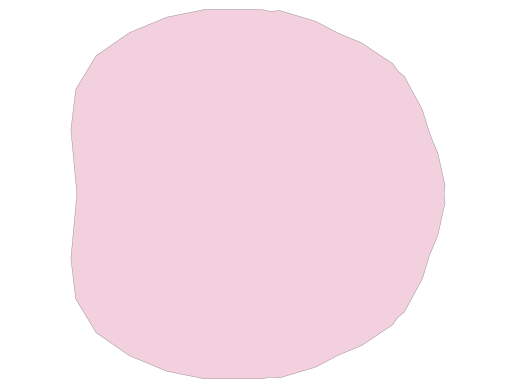

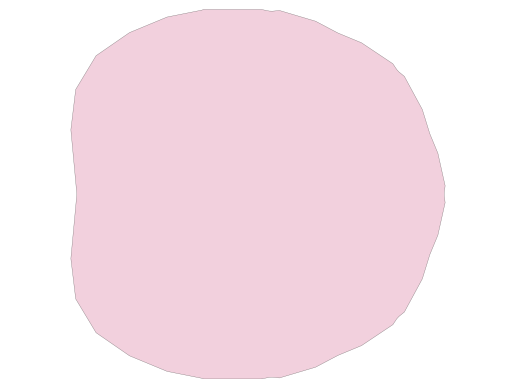

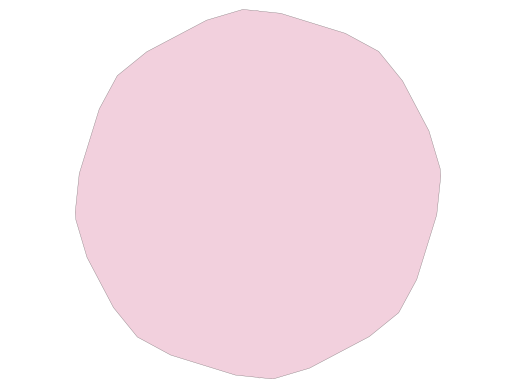

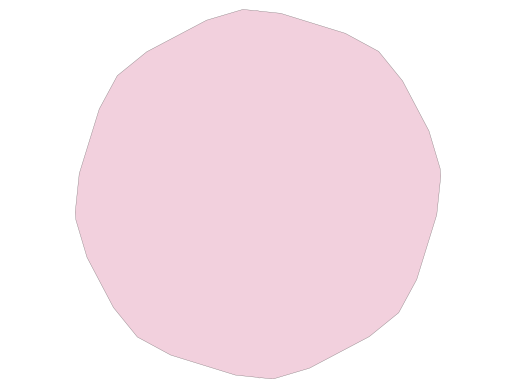

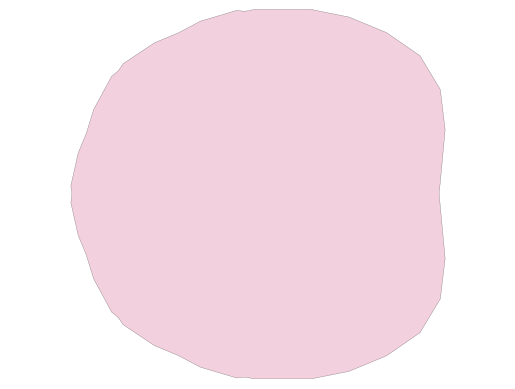

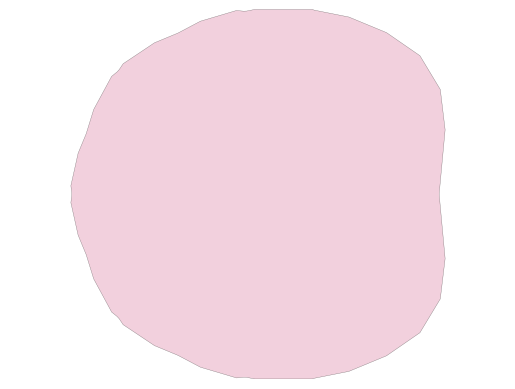

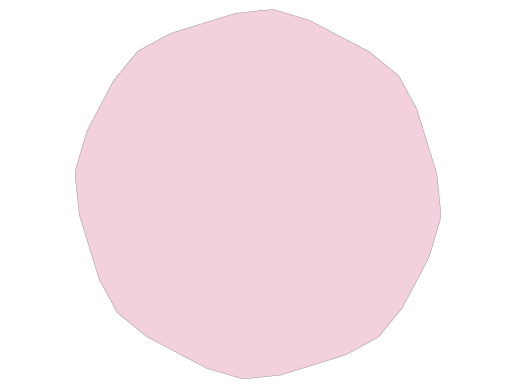

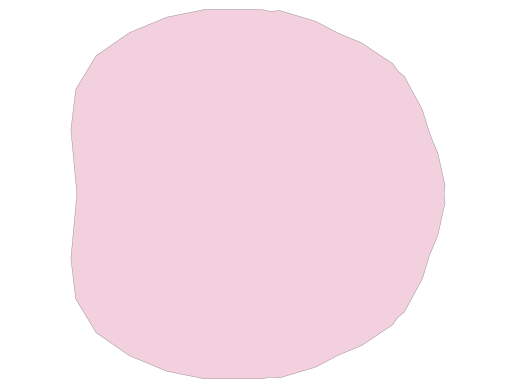

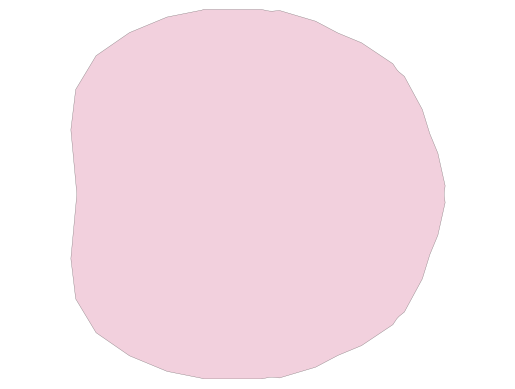

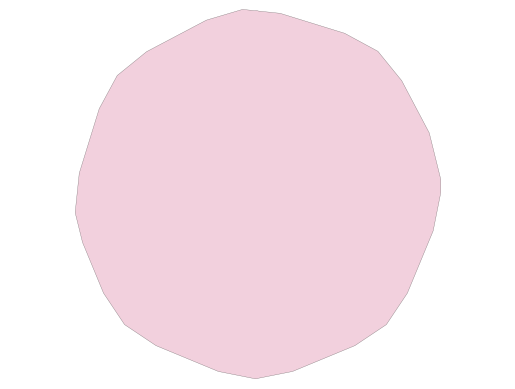

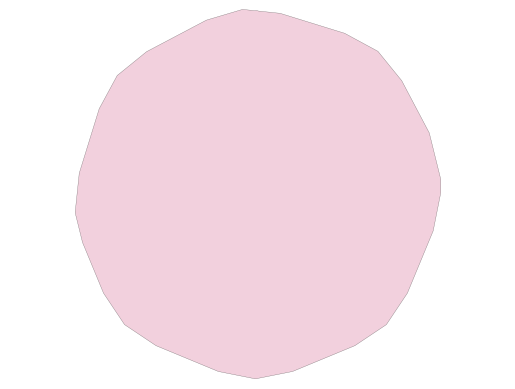

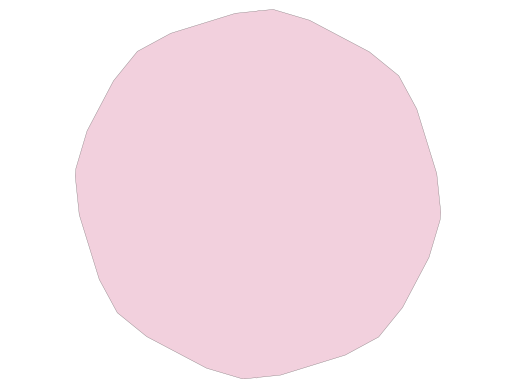

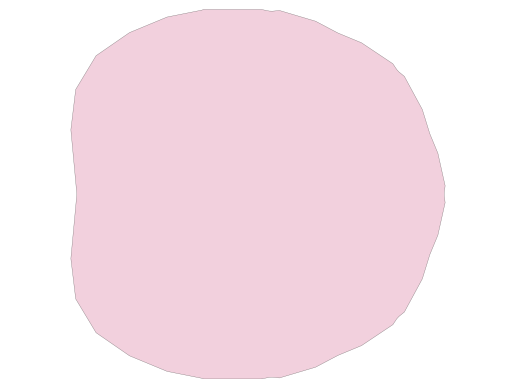

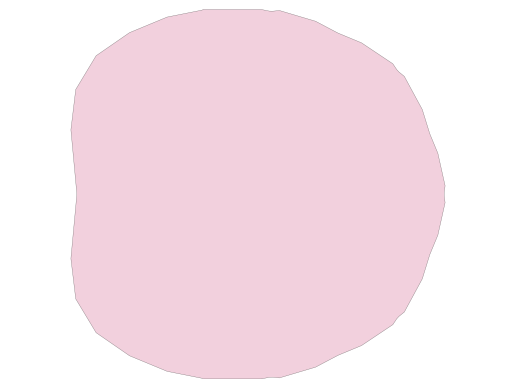

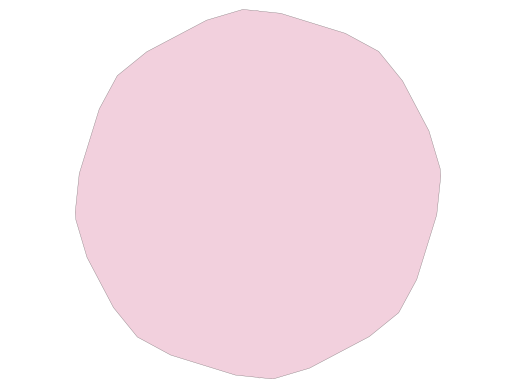

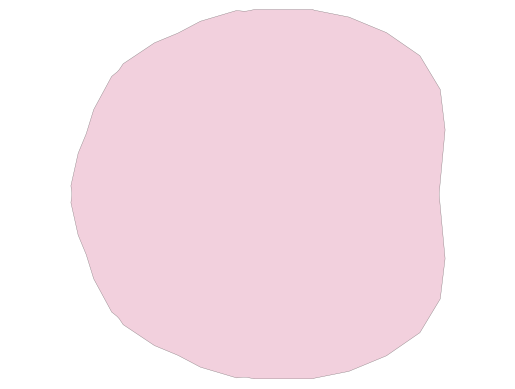

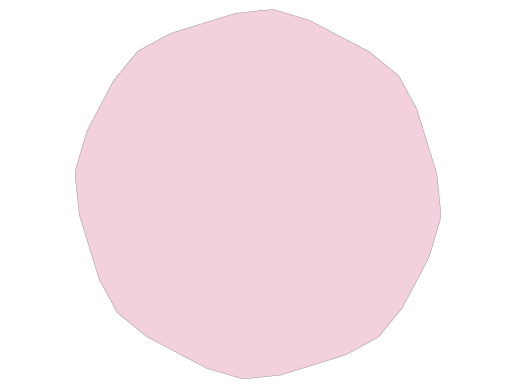

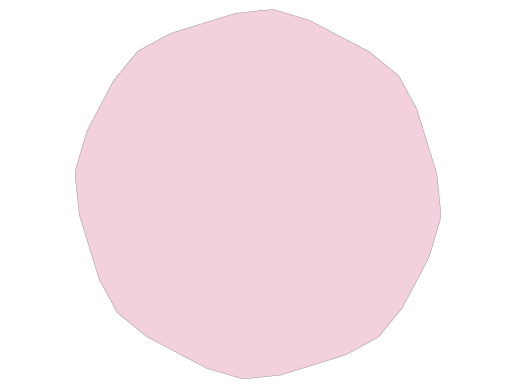

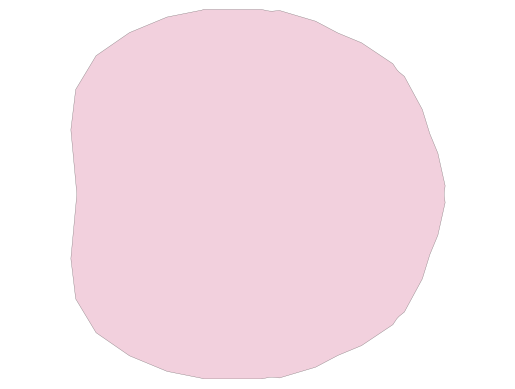

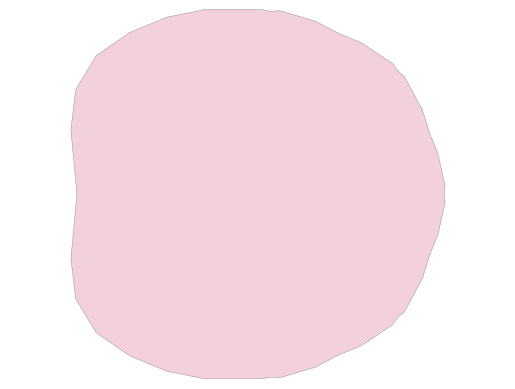

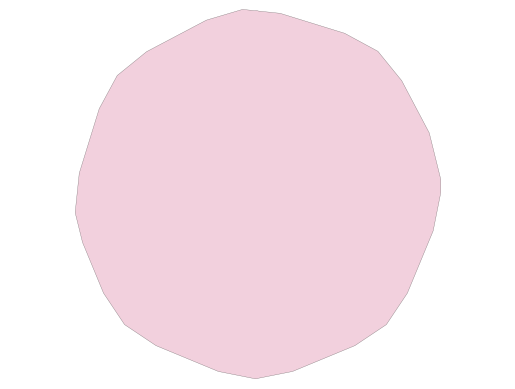

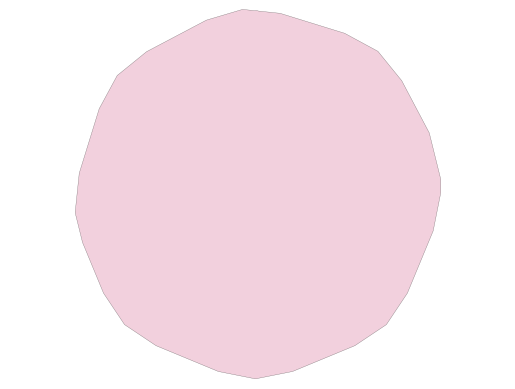

In [49]:
remaining_parts = frm.find_connected(remaining_material,is_adhesive)
for item in remaining_parts:
    item.plot(new=True)

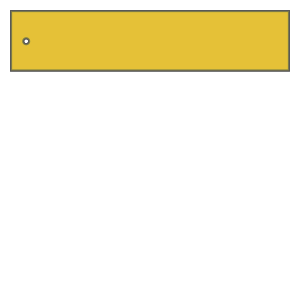

In [50]:
test_part=actual_final_device>>1
for result in remaining_parts:
    if not (result&test_part).is_null():
        break
result

AssertionError: 

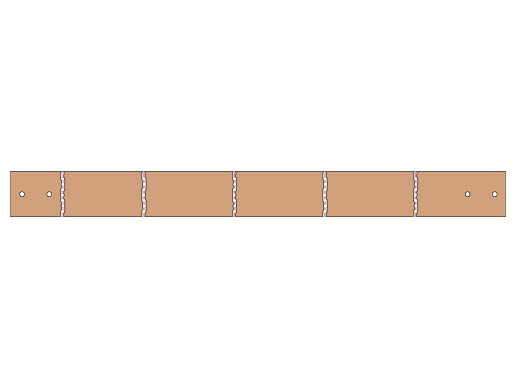

In [54]:
check = (result^actual_final_device)
check>>=1e-1
check.plot(new=True) # Added for diagnosis
assert(check.is_null())

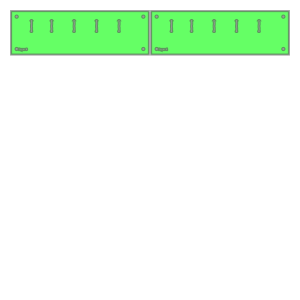

In [55]:
w,h = supported_design.get_dimensions()
p0,p1 = supported_design.bounding_box_coords()
rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
rigid_layer

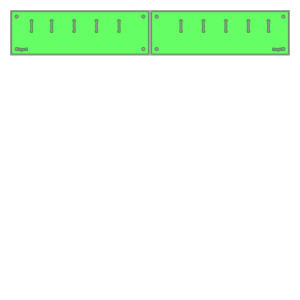

In [56]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+w+5,p0[1]-p2[1])
adhesive_layer = supported_design[1] | l4
adhesive_layer

In [57]:
first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
first_pass.export_dxf('first_pass')

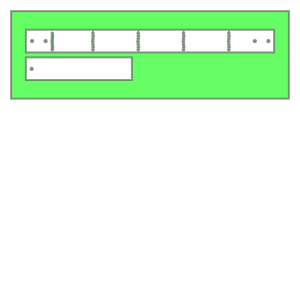

In [58]:
final_cut = sheet - keepout
final_cut = final_cut[0]
final_cut.export_dxf('final_cut')
final_cut

1.7320508075688774 1.7320508075688774 0.577350269189626


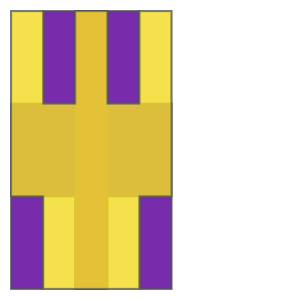

In [59]:
castellated_width,castellated_gap = \
frm.castellated_hinge_width(desired_degrees,thickness)
print(plain_width,castellated_gap,castellated_width)
hinge = frc.generate(castellated_gap,castellated_width)
hinge

In [60]:
support_width = 1

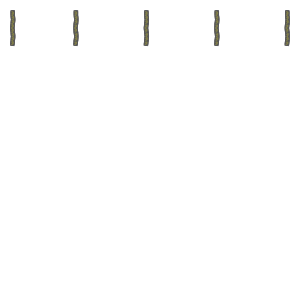

In [67]:
lam = Layer().to_laminate(len(hinge))
all_hinges = []
# Extract only the start and end points for each geometry in modified_joint_vertices
for item_coords in modified_joint_vertices:
    p3 = item_coords[0]
    p4 = item_coords[-1]
    all_hinges.append(hinge.map_line_stretch((0,0),(1,0),p3,p4))
all_hinges = lam.unary_union(*all_hinges)
all_hinges

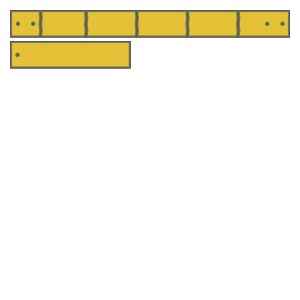

In [63]:
actual_final_device = Laminate(body_layer,body_layer,body_layer,body_layer,body_layer)
actual_final_device -= all_hinges
actual_final_device

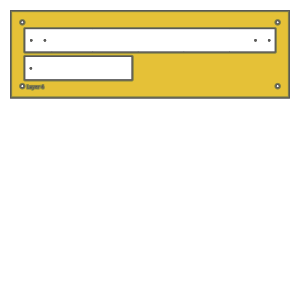

In [64]:
layer_id = \
frm.build_layer_numbers(NUM_LAYERS,text_size=jig_dia)
layer_id = layer_id.simplify(.2)
(x1,y1),(x2,y2) = actual_final_device.bounding_box_coords()
w1,h1 = actual_final_device.get_dimensions()
w2 = round(w1/jig_spacing)*jig_spacing+jig_spacing
h2 = round(h1/jig_spacing)*jig_spacing+jig_spacing
x1 -= (w2-w1)/2
y1 -= (h2-h1)/2
x2 += (w2-w1)/2
y2 += (h2-h1)/2
points = []
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))
alignment_holes_layer = Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes
sheet_layer = (alignment_holes_layer<<10).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet
removable_scrap = frm.calculate_removable_scrap(
    actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap - \
alignment_holes - \
layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

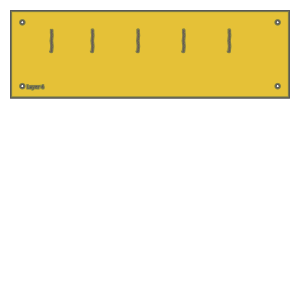

In [65]:
keepout = frm.keepout_laser(actual_final_device)
second_pass_scrap = sheet-keepout
first_pass_scrap = sheet - actual_final_device - second_pass_scrap
first_pass_scrap = frm.cleanup(first_pass_scrap,.00001)
support = frm.support(
actual_final_device,
frm.keepout_laser,
support_width,
support_width/2)
supported_design = web|actual_final_device|support
supported_design

GEOSException: AssertionFailedException: Should never reach here: Unable to determine overlay result geometry dimension

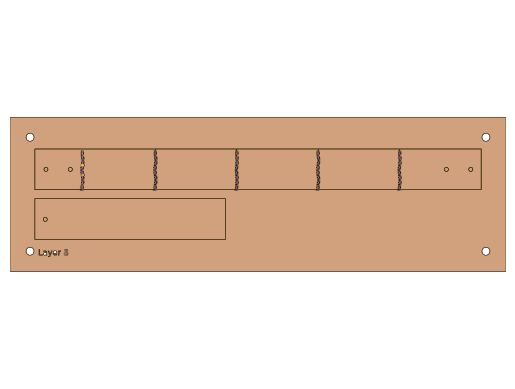

In [85]:
cut_material = (keepout<<kerf)-keepout
remaining_material = supported_design-cut_material
remaining_material = remaining_material.simplify(1e-4) # Added simplification
remaining_material.plot(new=True) # Added for diagnosis
remaining_parts = frm.find_connected(remaining_material,is_adhesive)
test=actual_final_device>>1
for result in remaining_parts:
    if not (result&test).is_null():
        break
check = (result^actual_final_device)
check>>=1e-1
assert(check.is_null())

# Inflate keepout by `kerf` to simulate cutting and verify parts remain connected correctly. `frm.find_connected` checks separability after release.

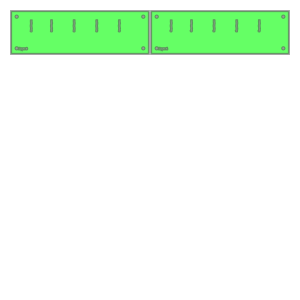

In [69]:
w,h = supported_design.get_dimensions()
p0,p1 = supported_design.bounding_box_coords()
rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
rigid_layer

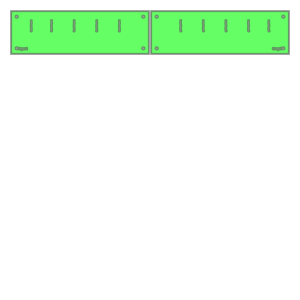

In [70]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+5+w,p0[1]-p2[1])
adhesive_layer = supported_design[1] | l4
adhesive_layer

# Export first pass panels and final release cut.

In [71]:
first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
first_pass.export_dxf('first_pass2-')

In [72]:
final_cut = sheet - keepout
final_cut = final_cut[0]

In [73]:
final_cut.export_dxf('final_cut2')

# Images of Layered Cuts

![image.png](attachment:image.png)

# First Pass Cut

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

# Final Cut - Second pass cut

![image.png](attachment:image.png)

# Answers to the Discussion questions

**Scaling Values I assumed :-**
Everything is drawn and exported 1:1 in millimeters; DXF numbers are treated as mm by LibreCAD/laser.

fr.display_height (300) and fr.resolution (4) affect only on-screen look, not physical size.

Kept original scale: 150×150 mm panel; all features in mm (jig_dia=5, jig_spacing=10, bounding_box_padding=10); effectively 1 DXF unit = 1 mm.

**(a) Did the design come out as expected?** Yes — first‑pass results matched the Chapter 52 workflow. The sheet outline, jig holes, body minus hinge windows, and bridges assembled correctly, enabling safe lamination for the second pass.

**(b) What would you adjust?**

- Remove all layer numbering text from outputs (not required and slows cutting).

- Keep current scaling and jig parameters for the butterfly; increase `desired_degrees` to **180°** to test near‑folded wing motion. This will increase `plain_width` automatically; ensure local stiffness is adequate or switch to castellated hinges if the window becomes too wide.

**(c) Geometry to optimize the design** - For the project leg: curve the thigh link to better distribute stress and integrate a **locally widened flexure** at the motor mount to encourage jumping/compression. Add **manual bridges** across that joint in the first pass to prevent premature release.

- Consider revisiting **kerf**: `kerf = 2` mm is unusually large for laser cutters (typical 0.05–0.2 mm). If your units are mm and machine kerf is smaller, reduce this to avoid over‑shrinking parts in verification.

**(d) Manufacturing considerations**

- Maintain `support_width > plain_width` so bridges are structurally meaningful.

- Keep jig holes consistent (e.g., `jig_dia = 5` mm plus clearance) and ensure the padded bounding box leaves sufficient tape/fixture margin.

- Use reliefs at hinge ends and fillets at tight corners to avoid stress risers.

- Keep joint guide lines short and inside the body’s bounding geometry. Very long joint lines that extend outside the part can be trimmed away (or entirely ignored) during Layer & body intersections, which makes them disappear from the body+joint output. Define joints to start and end well within the body (or pre-clip them to the body bbox) so the hinge windows are generated and visible.

# One Layer Workflow For My Project Design

In [74]:
import foldable_robotics.dxf as frd
import foldable_robotics as fr
import foldable_robotics.manufacturing as frm
from foldable_robotics.layer import Layer
from foldable_robotics.laminate import Laminate
import foldable_robotics.parts.castellated_hinge2 as frc
import shapely.geometry as sg
from foldable_robotics.pdf import Page
import foldable_robotics.pdf as frp
import foldable_robotics.parts.pill_joint as frpill
import foldable_robotics.plotter_support as frplt

In [75]:
fr.display_height=300
fr.resolution = 4
arc_approx = 10

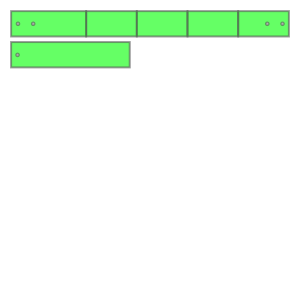

In [76]:
body_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf',layer='first_rigid', arc_approx = arc_approx)
body_polygons = [sg.Polygon(item) for item in body_vertices]
body_layer = Layer(*body_polygons)
hole_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf',layer='holes',arc_approx = arc_approx)
hole_layer = Layer(*[sg.Polygon(item) for item in hole_vertices])
cut_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf',layer='cuts',arc_approx = arc_approx)
cut_layer = Layer(*[sg.LineString(item) for item in cut_vertices])

cut_layer <<=.5
body_layer = body_layer - cut_layer - hole_layer
body_layer

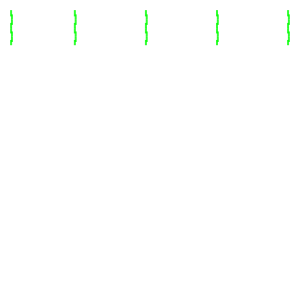

In [77]:
joint_vertices = frd.read_lwpolylines('canine_secondpass_layer0_rigid_bottom_modified.dxf', layer='joints')
joint_lines_original_layer = Layer(*[sg.LineString(item) for item in joint_vertices])
joint_lines_modified_layer = joint_lines_original_layer & body_layer
modified_joint_vertices = [list(item.coords) for item in joint_lines_modified_layer.geoms]
joint_lines_modified_layer

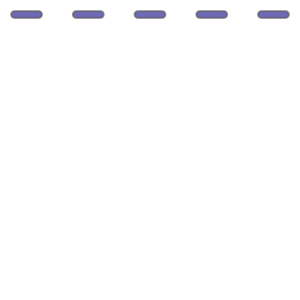

In [78]:
hinge = frpill.generate()
hinge

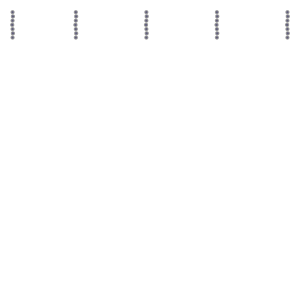

<Figure size 640x480 with 0 Axes>

In [82]:
plain_width = 1
NUM_LAYERS = 1
# Extract only the start and end points for each geometry
corrected_joint_vertices_one_layer = [[item[0], item[-1]] for item in modified_joint_vertices]
hole,dummy = frm.calc_hole(corrected_joint_vertices_one_layer,plain_width/2)
fr.my_line_width=0
holes = hole.to_laminate(NUM_LAYERS)
holes<<=.5 # add a little extra material to ensure we removed enough.
holes

In [83]:
support_width = 1

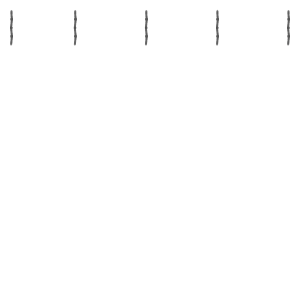

In [87]:
lam = Layer().to_laminate(len(hinge))
all_hinges = []
# Extract only the start and end points for each geometry in modified_joint_vertices
for item_coords in modified_joint_vertices:
    p3 = item_coords[0]
    p4 = item_coords[-1]
    all_hinges.append(hinge.map_line_stretch((0,0),(1,0),p3,p4))
all_hinges = lam.unary_union(*all_hinges)
all_hinges

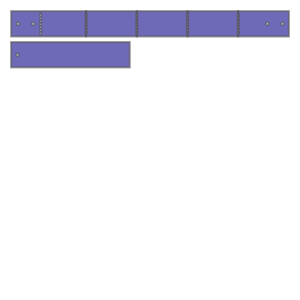

In [88]:
actual_final_device = Laminate(body_layer)
actual_final_device -= all_hinges
actual_final_device -= holes
actual_final_device

In [89]:
final_cut_scaled=actual_final_device[0].scale(frp.ppi/25.4,frp.ppi/25.4)
(x,y),(_,_) = final_cut_scaled.bounding_box_coords()
final_cut_scaled = final_cut_scaled.translate(-x,-y)

In [90]:
final_cut_scaled=actual_final_device[0].scale(1/25.4,1/25.4)
(x,y),(_,_) = final_cut_scaled.bounding_box_coords()
final_cut_scaled = final_cut_scaled.translate(-x,-y)
final_cut_scaled.bounding_box_coords()

[(np.float64(0.0), np.float64(0.0)),
 (np.float64(10.787007874015748), np.float64(2.185084735395949))]

In [91]:
final_cut_scaled.exteriors()

[[(4.606299212598425, 0.9842519685039369),
  (4.606299212598425, 0.0),
  (0.0, 0.0),
  (0.0, 0.9842519685039369),
  (4.606299212598425, 0.9842519685039369)],
 [(4.881102362204724, 2.0693271295633497),
  (4.881102362204724, 2.060952040085898),
  (4.8811323308927115, 2.060500051779955),
  (4.881217674495596, 2.0601168745963077),
  (4.881345400223479, 2.0598608437876567),
  (4.881496062992126, 2.0597709377236937),
  (4.881496062992126, 2.0567577036139246),
  (4.879552356945541, 2.056960038008379),
  (4.872190106373239, 2.0547712605410813),
  (4.865526869215537, 2.0512570827963335),
  (4.859562645472437, 2.046417504774135),
  (4.855904447557601, 2.039663908080031),
  (4.853677726292343, 2.03246738898756),
  (4.8528824816766605, 2.0248279474967212),
  (4.853013297834687, 2.0234196823687562),
  (4.854427348124172, 2.0177072823506323),
  (4.856349745608178, 2.0130662042724734),
  (4.860616925752366, 2.00667991787835),
  (4.867003212146489, 2.0024127377341623),
  (4.873962924559742, 1.99952993

In [92]:
s = frplt.layer_string(final_cut_scaled)
my_bytes= s.encode()
my_bytes

b'IN;P0;U0,0;D0,984;D4606,984;D4606,0;D0,0;U201,489;D200,484;D201,480;D201,475;D202,470;D204,466;D206,461;D209,457;D212,453;D215,449;D218,446;D222,443;D227,441;D231,439;D236,437;D240,436;D245,435;D250,435;D255,435;D260,436;D264,437;D269,439;D273,441;D278,443;D281,446;D285,449;D288,453;D291,457;D294,461;D296,466;D297,470;D299,475;D299,480;D300,484;D299,489;D299,494;D297,499;D296,503;D294,508;D291,512;D288,516;D285,520;D281,523;D278,526;D273,528;D269,530;D264,532;D260,533;D255,534;D250,534;D245,534;D240,533;D236,532;D231,530;D227,528;D222,526;D218,523;D215,520;D212,516;D209,512;D206,508;D204,503;D202,499;D201,494;D201,489;U4866,2051;D4860,2046;D4856,2040;D4854,2032;D4853,2025;D4853,2023;D4854,2018;D4856,2013;D4861,2007;D4867,2002;D4874,2000;D4881,1998;D4881,1939;D4875,1937;D4868,1933;D4864,1926;D4863,1917;D4864,1909;D4863,1901;D4864,1893;D4868,1886;D4875,1882;D4881,1880;D4881,1820;D4877,1820;D4869,1818;D4863,1814;D4858,1808;D4855,1803;D4853,1796;D4853,1794;D4854,1786;D4856,1779;D4860,177

In [93]:
p0 = 0,0
p1 = 4,0
line = sg.LineString([p0,p1])
layer = Layer(line)
s = frplt.layer_string(layer,draft=True,return_to_zero=False)
my_bytes= s.encode()
my_bytes

b'IN;P0;U0,0;U4000,0;@'